## IMPORT NECESSARY LIBRARIES

In [1]:
import os
import cv2
from imutils import paths
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import models,layers
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.preprocessing import Normalizer



In [2]:
datapath =r"F:\Dataset\Sign pics"

## READ DATA

In [3]:
pathToImage =list(paths.list_images(datapath))
#print(pathToImage)
data =[]
labels =[]
for images in pathToImage:
    label=images.split(os.path.sep)[-2]
    #print(label)
    image =cv2.imread(images)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    data.append(image)
    labels.append(label)
    #plt.figure()


In [4]:
#print(labels)

In [5]:
# Total number of images and labels
print('Total number of images',len(data))
print('Total number of labels',len(set(labels)))
print("Labels: ",[X for X in set(labels)])

Total number of images 1203
Total number of labels 3
Labels:  ['A', 'B', 'C']


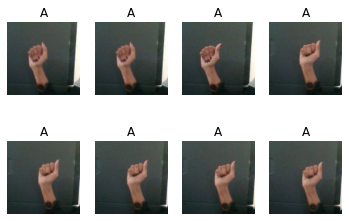

In [6]:
#plt.figure(figsize =(20,20))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(data[i])
    plt.title(labels[i])
    plt.axis('off')

In [7]:
blur_img =[]
clear_image =[]
for img in data:
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    Gaussain_blur =cv2.GaussianBlur(gray,(5,5),2) 
    th3=cv2.adaptiveThreshold(Gaussain_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret,res = cv2.threshold(th3, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((3, 3), np.uint8)
    closing = cv2.morphologyEx(res, cv2.MORPH_CLOSE, kernel, iterations=1)
    #dilation = cv2.erode(closing, kernel, iterations=1)
    img_erosion = cv2.erode(img, kernel, iterations=1)  
    img_dilation = cv2.dilate(img, kernel, iterations=1)  
    cv2.imshow('Input', img)  
    cv2.imshow('Dilation', img_dilation)  
    clear_image.append(closing)       
    blur_img.append(Gaussain_blur)
    
    

In [8]:
print(ret)

0.0


In [9]:
print(res)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255   0 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


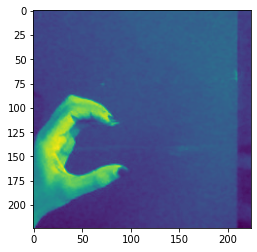

In [10]:
plt.imshow(gray)

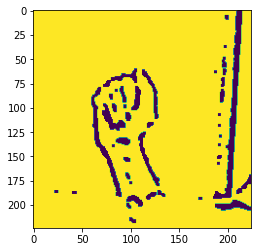

In [11]:
plt.imshow(clear_image[1])

In [12]:
clear_image[1]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

## Gaussian blur image

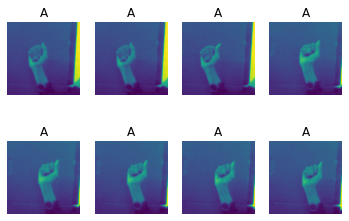

In [13]:
#plt.figure(figsize =(20,20))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(blur_img[i])
    plt.title(labels[i])
    plt.axis('off')
    
    
    

## clear image

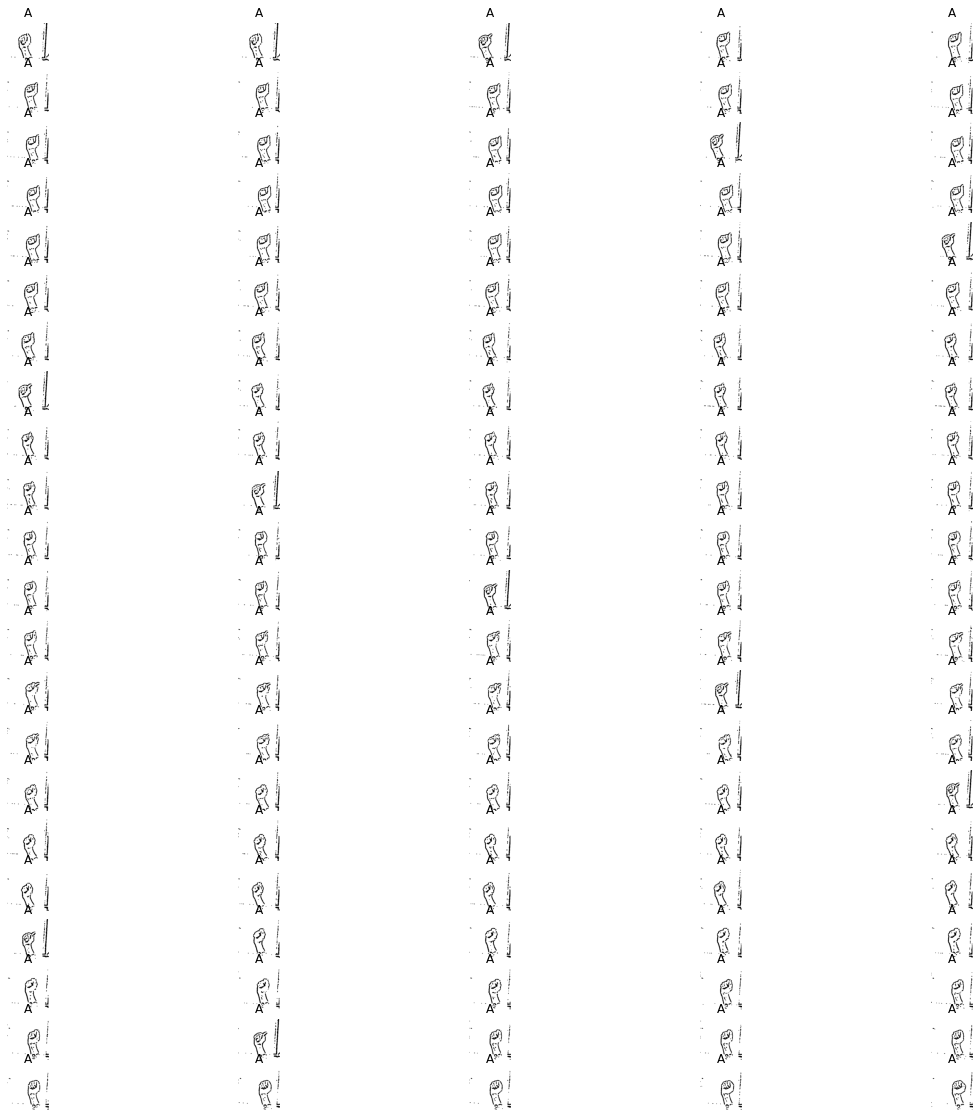

In [14]:
plt.figure(figsize =(20,20))
for i in range(110):
    plt.subplot(22, 5, i + 1)
    plt.imshow(clear_image[i],cmap ="gray")
    plt.title(labels[i])
    plt.axis('off')

In [15]:
data =np.array(clear_image)
labels =np.array(labels)


## SPLITTING DATA 

In [16]:
x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size =0.2,stratify =labels,random_state =42)

## SHAPE OF TRAINING AND TESTING DATA

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(962, 224, 224)
(962,)
(241, 224, 224)
(241,)


## NORMALIZING THE DATA

In [18]:
#x_train =Normalizer().fit_transform(x_train)
#x_test =Normalizer().fit_transform(x_test)

In [19]:
x_train =x_train/255
x_test = x_test/255

In [20]:
print(x_train)

[[[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 ...

 [[1. 1. 1. ... 1. 0. 0.]
  [1. 1. 1. ... 1. 0. 0.]
  [1. 1. 1. ... 1. 0. 0.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 0. 0.]
  [1. 1. 1. ... 1. 0. 0.]
  [1. 1. 1. ... 1. 0. 0.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]]


In [21]:
print(y_train)

['B' 'B' 'A' 'A' 'B' 'A' 'C' 'A' 'A' 'A' 'C' 'B' 'A' 'B' 'A' 'A' 'A' 'A'
 'A' 'B' 'B' 'A' 'C' 'C' 'B' 'C' 'C' 'A' 'C' 'C' 'C' 'C' 'A' 'A' 'C' 'C'
 'A' 'C' 'B' 'A' 'C' 'C' 'C' 'B' 'C' 'B' 'A' 'A' 'A' 'A' 'C' 'B' 'B' 'C'
 'A' 'C' 'C' 'B' 'A' 'B' 'B' 'A' 'A' 'B' 'A' 'A' 'C' 'B' 'C' 'C' 'B' 'B'
 'B' 'B' 'A' 'A' 'A' 'C' 'C' 'B' 'B' 'A' 'B' 'A' 'C' 'A' 'C' 'A' 'A' 'A'
 'A' 'B' 'C' 'C' 'A' 'B' 'A' 'C' 'C' 'A' 'B' 'B' 'C' 'A' 'B' 'A' 'C' 'B'
 'A' 'B' 'C' 'B' 'C' 'B' 'A' 'C' 'B' 'B' 'A' 'C' 'A' 'C' 'A' 'C' 'B' 'B'
 'A' 'C' 'C' 'A' 'A' 'B' 'C' 'A' 'C' 'C' 'A' 'C' 'B' 'A' 'A' 'C' 'C' 'B'
 'C' 'B' 'A' 'B' 'C' 'C' 'B' 'C' 'B' 'B' 'B' 'C' 'C' 'A' 'A' 'B' 'A' 'C'
 'C' 'C' 'A' 'A' 'C' 'C' 'A' 'B' 'A' 'B' 'B' 'B' 'B' 'C' 'B' 'A' 'A' 'A'
 'C' 'B' 'A' 'A' 'B' 'C' 'C' 'A' 'B' 'B' 'B' 'A' 'A' 'C' 'B' 'C' 'B' 'A'
 'B' 'A' 'B' 'C' 'A' 'B' 'B' 'A' 'A' 'B' 'A' 'A' 'B' 'B' 'C' 'A' 'C' 'A'
 'C' 'B' 'C' 'A' 'B' 'C' 'A' 'C' 'B' 'B' 'A' 'B' 'A' 'C' 'C' 'B' 'C' 'B'
 'B' 'C' 'B' 'B' 'C' 'C' 'A' 'B' 'C' 'A' 'C' 'C' 'B

In [22]:
#x_train = x_train.reshape(120, 224*224*3)
#x_test = x_test.reshape(30,224*224*3 )

In [23]:
x_train = x_train.reshape(962,224,224,1)
x_test =x_test.reshape(241,224,224,1)

In [24]:
x_test.shape

(241, 224, 224, 1)

In [25]:
x_train.ndim

4

In [26]:
y_train

array(['B', 'B', 'A', 'A', 'B', 'A', 'C', 'A', 'A', 'A', 'C', 'B', 'A',
       'B', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'A', 'C', 'C', 'B', 'C',
       'C', 'A', 'C', 'C', 'C', 'C', 'A', 'A', 'C', 'C', 'A', 'C', 'B',
       'A', 'C', 'C', 'C', 'B', 'C', 'B', 'A', 'A', 'A', 'A', 'C', 'B',
       'B', 'C', 'A', 'C', 'C', 'B', 'A', 'B', 'B', 'A', 'A', 'B', 'A',
       'A', 'C', 'B', 'C', 'C', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'C',
       'C', 'B', 'B', 'A', 'B', 'A', 'C', 'A', 'C', 'A', 'A', 'A', 'A',
       'B', 'C', 'C', 'A', 'B', 'A', 'C', 'C', 'A', 'B', 'B', 'C', 'A',
       'B', 'A', 'C', 'B', 'A', 'B', 'C', 'B', 'C', 'B', 'A', 'C', 'B',
       'B', 'A', 'C', 'A', 'C', 'A', 'C', 'B', 'B', 'A', 'C', 'C', 'A',
       'A', 'B', 'C', 'A', 'C', 'C', 'A', 'C', 'B', 'A', 'A', 'C', 'C',
       'B', 'C', 'B', 'A', 'B', 'C', 'C', 'B', 'C', 'B', 'B', 'B', 'C',
       'C', 'A', 'A', 'B', 'A', 'C', 'C', 'C', 'A', 'A', 'C', 'C', 'A',
       'B', 'A', 'B', 'B', 'B', 'B', 'C', 'B', 'A', 'A', 'A', 'C

In [27]:
#x_train.reshape()

In [28]:
#x_train =Normalizer().fit_transform(x_train)
#x_test =Normalizer().fit_transform(x_test)

In [29]:
x_train[0].max()

1.0

In [30]:
lb = preprocessing.LabelBinarizer()
y_train =lb.fit_transform(y_train)
y_test =lb.fit_transform(y_test)

In [31]:
x_test.shape,y_test.shape

((241, 224, 224, 1), (241, 3))

## DATA GENERATOR

In [32]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically 
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )  
datagen.fit(x_train)

## CNN MODEL

In [33]:
#CNN
# 1st sequential for forward and backoard propogation
model = models.Sequential()
#adding convolution layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1),padding ='same'))
#max pooling
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding ='same'))
model.add(layers.MaxPooling2D((2, 2)))
# Drop_out
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding ='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding ='same'))
model.add(layers.MaxPooling2D((2, 2)))


In [34]:
# now flatten 
model.add(layers.Flatten())
# fully connected neural network
model.add(layers.Dense(256, activation='relu'))
#model.add(layers.Dense(200,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 56, 56, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [36]:
x_train.shape,y_train.shape

((962, 224, 224, 1), (962, 3))

In [37]:
x_test.shape,y_test.shape

((241, 224, 224, 1), (241, 3))

In [38]:
y_train

array([[0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [39]:
# compile and train model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit_generator(datagen.flow(x_train, y_train), epochs = 100, validation_data=(x_test,y_test))

C:\Users\Salahuddin\AppData\Local\Temp\ipykernel_45656\1621296704.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train), epochs = 100, validation_data=(x_test,y_test))


Epoch 1/100
31/31 [==============================] - 42s 1s/step - loss: 1.2136 - accuracy: 0.3160 - val_loss: 1.0986 - val_accuracy: 0.3320
Epoch 2/100
31/31 [==============================] - 40s 1s/step - loss: 1.0988 - accuracy: 0.3378 - val_loss: 1.0985 - val_accuracy: 0.3320
Epoch 3/100
31/31 [==============================] - 41s 1s/step - loss: 1.0986 - accuracy: 0.3337 - val_loss: 1.0983 - val_accuracy: 0.3320
Epoch 4/100
31/31 [==============================] - 45s 1s/step - loss: 1.0989 - accuracy: 0.3524 - val_loss: 1.0984 - val_accuracy: 0.3361
Epoch 5/100
31/31 [==============================] - 43s 1s/step - loss: 1.0982 - accuracy: 0.3867 - val_loss: 1.1006 - val_accuracy: 0.3195
Epoch 6/100
31/31 [==============================] - 40s 1s/step - loss: 1.0549 - accuracy: 0.4314 - val_loss: 0.9567 - val_accuracy: 0.5145
Epoch 7/100
31/31 [==============================] - 42s 1s/step - loss: 0.9180 - accuracy: 0.5322 - val_loss: 1.0800 - val_accuracy: 0.4813
Epoch 8/100
3

## PLOTTING 

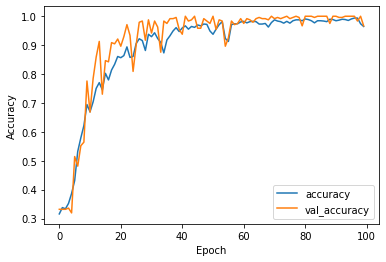

In [40]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(validation_ds, verbose=2)

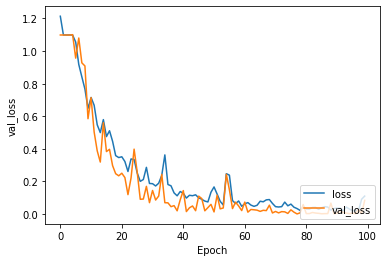

In [41]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('val_loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [42]:
x_test.shape

(241, 224, 224, 1)

In [43]:
y_test.shape

(241, 3)

In [44]:
score = model.evaluate(x_test, y_test,batch_size=32)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

8/8 [==============================] - 2s 272ms/step - loss: 0.0840 - accuracy: 0.9668
Test loss: 0.08402565121650696
Test accuracy: 0.9668049812316895


In [45]:
y_predict=model.predict(x_test)
print(y_predict)
y_result  =np.argmax(y_predict,axis =1)
print(y_result)
y_test=np.argmax(y_test,axis =1)

[[9.99998450e-01 8.46570401e-07 7.50490585e-07]
 [1.11987479e-01 1.13361182e-06 8.88011336e-01]
 [9.99994040e-01 1.77601453e-06 4.12990130e-06]
 [9.99983191e-01 1.66793270e-05 7.33073051e-08]
 [1.00000000e+00 1.26986714e-08 5.62642342e-08]
 [6.85718696e-05 9.99931455e-01 1.97105353e-11]
 [9.99999046e-01 8.99721329e-07 2.21771419e-08]
 [1.04799343e-03 9.02594820e-07 9.98951077e-01]
 [7.15663284e-03 9.92843330e-01 2.41509840e-10]
 [9.99999523e-01 3.50706557e-07 8.35621918e-08]
 [3.11500771e-04 1.61392535e-08 9.99688506e-01]
 [9.99999881e-01 2.92401880e-09 1.34683361e-07]
 [1.10482154e-02 9.88951743e-01 1.00897246e-08]
 [8.90818797e-03 9.91091788e-01 6.25241109e-11]
 [1.00000000e+00 5.24326289e-08 8.45449665e-12]
 [4.01625305e-01 5.98374605e-01 3.52650265e-09]
 [1.82707045e-05 3.74334008e-10 9.99981761e-01]
 [9.99795377e-01 1.82136078e-04 2.25505864e-05]
 [1.00000000e+00 5.19827381e-08 2.32447256e-10]
 [1.00000000e+00 1.43610945e-09 1.43644228e-11]
 [1.10696800e-01 1.24064695e-06 8.893020

In [46]:
print(y_result)

[0 2 0 0 0 1 0 2 1 0 2 0 1 1 0 1 2 0 0 0 2 0 0 1 1 0 2 1 0 0 0 2 1 2 2 2 2
 0 2 0 2 2 2 0 2 2 2 2 1 0 0 0 0 2 2 1 1 1 2 2 2 2 2 0 1 1 0 1 2 2 1 1 0 1
 0 0 2 1 0 1 2 0 0 0 1 0 1 2 1 1 1 1 2 2 0 1 1 1 0 1 1 2 2 2 2 1 0 0 0 0 0
 0 2 0 0 2 0 1 2 2 1 2 1 0 1 1 0 1 1 2 2 2 1 2 1 0 0 2 0 2 2 0 0 0 1 2 2 0
 0 2 1 1 0 1 1 2 1 0 2 1 2 2 0 0 2 2 0 0 2 1 2 0 0 0 1 0 0 0 0 1 2 1 2 2 2
 1 2 2 1 2 2 0 2 2 1 1 1 2 0 1 0 2 0 0 0 1 1 0 2 0 0 2 1 1 0 2 0 0 0 0 1 2
 2 0 2 1 1 1 1 0 0 2 1 2 1 0 0 1 2 1 0]


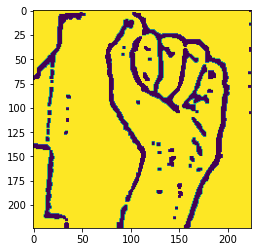

In [47]:
plt.imshow(x_test[0])

## PLOTTING CONFUSION MATRIX

accuracy_score 0.966804979253112

confusion_matrix               precision    recall  f1-score   support

           0       0.91      1.00      0.95        80
           1       1.00      0.90      0.95        80
           2       1.00      1.00      1.00        81

    accuracy                           0.97       241
   macro avg       0.97      0.97      0.97       241
weighted avg       0.97      0.97      0.97       241



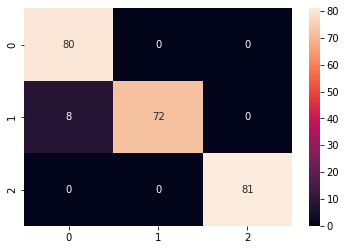

In [48]:
from sklearn.metrics import classification_report as cr,accuracy_score,confusion_matrix
cm =confusion_matrix(y_test,y_result)
sns.heatmap(cm,annot =True)
print("accuracy_score",accuracy_score(y_test,y_result))
print()
print('confusion_matrix',cr(y_test,y_result))

In [49]:
y_test

array([0, 2, 0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 0, 0, 2, 0,
       0, 1, 1, 0, 2, 1, 0, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1,
       0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2,
       1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1, 0, 0, 0, 1,
       1, 0, 2, 0, 0, 2, 0, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 1, 2, 2, 2,
       1, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 0, 1, 2, 2, 0, 0, 2, 1, 1, 0, 1,
       1, 2, 1, 0, 2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 1, 1, 2,
       0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 2, 1, 0, 2, 1, 1, 1, 2, 0, 0, 0, 0,
       1, 2, 2, 0, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 0, 0, 1, 2, 1, 0],
      dtype=int64)

In [57]:
model.save("Karasmodel.h5")

# PREDICTION

(1, 224, 224, 1)


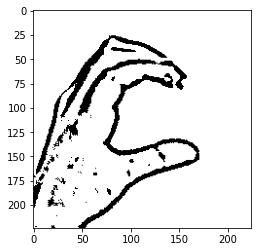

In [50]:
image =cv2.imread(r"F:\Dataset\pic's\C\5.jpg")
gray =cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
Gaussain_blur =cv2.GaussianBlur(gray,(5,5),4)
th3=cv2.adaptiveThreshold(Gaussain_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
ret,res = cv2.threshold(th3, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(res, cv2.MORPH_CLOSE, kernel, iterations=1)
test_image =closing/255
test_image = np.expand_dims(test_image,0)
test_image = test_image.reshape(1,224,224,1)


plt.imshow(res,cmap ="gray")
print(test_image.shape)

In [51]:
pred_img= model.predict(np.array(test_image))
print(pred_img)
pred_result  =np.argmax(pred_img,axis =1)
pred_result

[[5.3302936e-02 3.3079541e-08 9.4669706e-01]]


array([2], dtype=int64)

(1, 224, 224, 1)


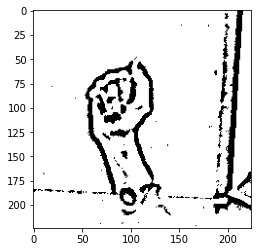

In [52]:
image_b =cv2.imread(r'F:\Dataset\Sign pics\A\3.jpg')
gray =cv2.cvtColor(image_b,cv2.COLOR_BGR2GRAY)
Gaussain_blur =cv2.GaussianBlur(gray,(5,5),4)
th3=cv2.adaptiveThreshold(Gaussain_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
ret,res = cv2.threshold(th3, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(res, cv2.MORPH_CLOSE, kernel, iterations=1)
test_image =closing/255
test_image = np.expand_dims(test_image,0)
test_image = test_image.reshape(1,224,224,1)
plt.imshow(res,cmap ="gray")
print(test_image.shape)

In [53]:
pred_img=model.predict(np.array(test_image))
print(pred_img)
pred_result  =np.argmax(pred_img,axis =1)
pred_result

[[9.9999404e-01 4.5065926e-06 1.3841247e-06]]


array([0], dtype=int64)

(1, 224, 224, 1)


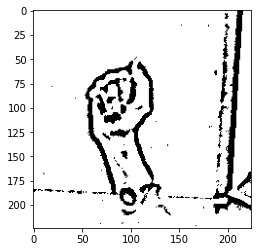

In [54]:
image_c =cv2.imread(r"F:\Dataset\Sign pics\A\3.jpg")
gray =cv2.cvtColor(image_c,cv2.COLOR_BGR2GRAY)
Gaussain_blur =cv2.GaussianBlur(gray,(5,5),4)
th3=cv2.adaptiveThreshold(Gaussain_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
ret,res = cv2.threshold(th3, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(res, cv2.MORPH_CLOSE, kernel, iterations=1)
test_image =closing/255
test_image = np.expand_dims(test_image,0)
test_image = test_image.reshape(1,224,224,1)
plt.imshow(res,cmap ="gray")
print(test_image.shape)

In [55]:
pred_img=model.predict(np.array(test_image))
print(pred_img)
pred_result  =np.argmax(pred_img,axis =1)
pred_result

[[9.9999404e-01 4.5065926e-06 1.3841247e-06]]


array([0], dtype=int64)

In [ ]:
m